In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns

### Experiment measuring the primacy and recency effect on memory retention

#### Import Data

,wait,correctSequence,userInput
0,1,['42' '64' '21' '92' '31'],['42' '21' '31' '64' '23']


In [3]:
df = pd.read_csv('increasing_wait_time_free_recall.csv')

display(df)
# Create 'userInput' column: array of values from columns with "Answered" in the name
# df['userInput'] = df[[col for col in df.columns if 'Answered' in col]].values.tolist()
dfnew = pd.DataFrame()
dfnew['userInput'] = df[[col for col in df.columns if 0<int(col)<11]].fillna('').values.tolist()
# Create 'correctSequence' column: array of values from columns with "Correct" in the name
# df['correctSequence'] = df[[col for col in df.columns if 'Correct' in col]].values.tolist()
dfnew['correctSequence'] = df[[col for col in df.columns if int(col)>11]].values.tolist()
display(dfnew)
# df = df.drop(columns=[col for col in df.columns if 'Answered' in col or 'Correct' in col])
dfnew['wait'] = df['0']
dfnew

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.5,23.0,83.0,33.0,19.0,47.0,77.0,60.0,68.0,53.0,...,23.0,33.0,43.0,19.0,57.0,75.0,45.0,45.0,45.0,32.0
1,0.5,18.0,62.0,33.0,53.0,84.0,96.0,21.0,60.0,90.0,...,31.0,90.0,64.0,23.0,33.0,34.0,23.0,16.0,86.0,87.0
2,0.5,88.0,67.0,14.0,59.0,70.0,78.0,60.0,74.0,25.0,...,25.0,84.0,86.0,75.0,14.0,18.0,62.0,76.0,78.0,89.0
3,1.0,34.0,37.0,51.0,21.0,87.0,17.0,96.0,16.0,83.0,...,34.0,37.0,97.0,83.0,16.0,15.0,76.0,98.0,67.0,23.0
4,1.0,90.0,43.0,33.0,26.0,98.0,75.0,53.0,32.0,69.0,...,69.0,96.0,90.0,33.0,43.0,75.0,76.0,23.0,14.0,43.0
5,1.0,65.0,83.0,75.0,89.0,26.0,34.0,90.0,18.0,23.0,...,90.0,18.0,23.0,63.0,21.0,98.0,91.0,74.0,45.0,34.0
6,1.5,42.0,84.0,59.0,33.0,39.0,81.0,28.0,10.0,29.0,...,42.0,84.0,10.0,29.0,81.0,91.0,33.0,24.0,65.0,85.0
7,1.5,41.0,11.0,24.0,51.0,21.0,72.0,66.0,95.0,18.0,...,75.0,91.0,24.0,22.0,51.0,21.0,72.0,43.0,95.0,34.0
8,1.5,65.0,53.0,18.0,29.0,46.0,22.0,74.0,10.0,34.0,...,10.0,70.0,34.0,65.0,29.0,65.0,73.0,23.0,54.0,34.0
9,2.5,96.0,97.0,26.0,21.0,72.0,47.0,56.0,69.0,70.0,...,96.0,97.0,21.0,57.0,69.0,77.0,72.0,27.0,26.0,67.0


,userInput,correctSequence
0,"[23.0, 83.0, 33.0, 19.0, 47.0, 77.0, 60.0, 68....","[33.0, 43.0, 19.0, 57.0, 75.0, 45.0, 45.0, 45...."
1,"[18.0, 62.0, 33.0, 53.0, 84.0, 96.0, 21.0, 60....","[90.0, 64.0, 23.0, 33.0, 34.0, 23.0, 16.0, 86...."
2,"[88.0, 67.0, 14.0, 59.0, 70.0, 78.0, 60.0, 74....","[84.0, 86.0, 75.0, 14.0, 18.0, 62.0, 76.0, 78...."
3,"[34.0, 37.0, 51.0, 21.0, 87.0, 17.0, 96.0, 16....","[37.0, 97.0, 83.0, 16.0, 15.0, 76.0, 98.0, 67...."
4,"[90.0, 43.0, 33.0, 26.0, 98.0, 75.0, 53.0, 32....","[96.0, 90.0, 33.0, 43.0, 75.0, 76.0, 23.0, 14...."
5,"[65.0, 83.0, 75.0, 89.0, 26.0, 34.0, 90.0, 18....","[18.0, 23.0, 63.0, 21.0, 98.0, 91.0, 74.0, 45...."
6,"[42.0, 84.0, 59.0, 33.0, 39.0, 81.0, 28.0, 10....","[84.0, 10.0, 29.0, 81.0, 91.0, 33.0, 24.0, 65...."
7,"[41.0, 11.0, 24.0, 51.0, 21.0, 72.0, 66.0, 95....","[91.0, 24.0, 22.0, 51.0, 21.0, 72.0, 43.0, 95...."
8,"[65.0, 53.0, 18.0, 29.0, 46.0, 22.0, 74.0, 10....","[70.0, 34.0, 65.0, 29.0, 65.0, 73.0, 23.0, 54...."
9,"[96.0, 97.0, 26.0, 21.0, 72.0, 47.0, 56.0, 69....","[97.0, 21.0, 57.0, 69.0, 77.0, 72.0, 27.0, 26...."


,userInput,correctSequence,wait
0,"[23.0, 83.0, 33.0, 19.0, 47.0, 77.0, 60.0, 68....","[33.0, 43.0, 19.0, 57.0, 75.0, 45.0, 45.0, 45....",0.5
1,"[18.0, 62.0, 33.0, 53.0, 84.0, 96.0, 21.0, 60....","[90.0, 64.0, 23.0, 33.0, 34.0, 23.0, 16.0, 86....",0.5
2,"[88.0, 67.0, 14.0, 59.0, 70.0, 78.0, 60.0, 74....","[84.0, 86.0, 75.0, 14.0, 18.0, 62.0, 76.0, 78....",0.5
3,"[34.0, 37.0, 51.0, 21.0, 87.0, 17.0, 96.0, 16....","[37.0, 97.0, 83.0, 16.0, 15.0, 76.0, 98.0, 67....",1.0
4,"[90.0, 43.0, 33.0, 26.0, 98.0, 75.0, 53.0, 32....","[96.0, 90.0, 33.0, 43.0, 75.0, 76.0, 23.0, 14....",1.0
5,"[65.0, 83.0, 75.0, 89.0, 26.0, 34.0, 90.0, 18....","[18.0, 23.0, 63.0, 21.0, 98.0, 91.0, 74.0, 45....",1.0
6,"[42.0, 84.0, 59.0, 33.0, 39.0, 81.0, 28.0, 10....","[84.0, 10.0, 29.0, 81.0, 91.0, 33.0, 24.0, 65....",1.5
7,"[41.0, 11.0, 24.0, 51.0, 21.0, 72.0, 66.0, 95....","[91.0, 24.0, 22.0, 51.0, 21.0, 72.0, 43.0, 95....",1.5
8,"[65.0, 53.0, 18.0, 29.0, 46.0, 22.0, 74.0, 10....","[70.0, 34.0, 65.0, 29.0, 65.0, 73.0, 23.0, 54....",1.5
9,"[96.0, 97.0, 26.0, 21.0, 72.0, 47.0, 56.0, 69....","[97.0, 21.0, 57.0, 69.0, 77.0, 72.0, 27.0, 26....",2.5


[np.float64(0.3333333333333333), np.float64(2.0), np.float64(1.3333333333333333), np.float64(1.6666666666666667)]


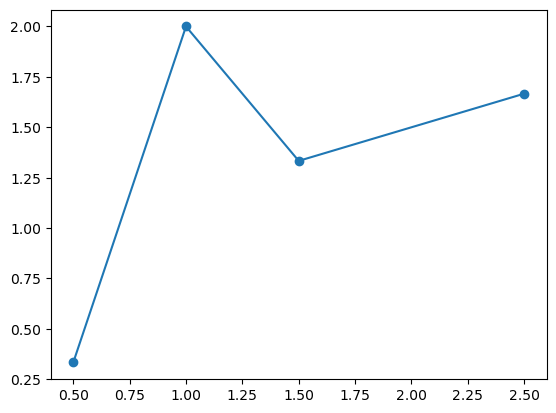

In [4]:
accuracies = []
wait_times = dfnew['wait'].unique()
for wait in wait_times:
    subset = dfnew[dfnew['wait'] == wait]
    correct_counts = []
    for index, row in subset.iterrows():
        user_input = [str(i) for i in row['userInput'] if i != '']
        correct_sequence = [str(i) for i in row['correctSequence'] if i != '']
        correct_count = sum(1 for ui, ci in zip(np.unique(correct_sequence), np.unique(user_input)) if ui == ci)
        correct_counts.append(correct_count)
    average_accuracy = np.mean(correct_counts)
    
    accuracies.append(average_accuracy)  # Assuming max score is 10


print(accuracies)
plt.plot(wait_times, accuracies, marker='o')

In [5]:
testAr1 = ['12', '56', '53', '78']
testAr2 = ['56', '33', '12', '79']

sum(1 for ui, ci in zip(np.unique(testAr1), np.unique(testAr2)) if ui == ci)

2

In [26]:
waitss = np.array([wait] * 2)
waitss

array([2.5, 2.5])

In [28]:
testAr1 = [['12', '56'],[ '53', '78']]
testAr2 = [['56', '33'], ['12', '79']]

pdf = pd.DataFrame([waitss,testAr1, testAr2]).T
pdf.columns = ['wait', 'userInput', 'correctSequence']
pdf

,wait,userInput,correctSequence
0,2.5,"[12, 56]","[56, 33]"
1,2.5,"[53, 78]","[12, 79]"


In [6]:
import pandas as pd
df = pd.read_csv('Ali/eksperiment1.csv')
df

,0,1,2
0,0.5,['47' '19' '81' '42' '27' '86' '40' '92' '58' ...,['25' '23' '81' '47' '49' '27' '33' '81' '85' ...
1,0.5,['51' '64' '75' '80' '25' '27' '72' '28' '59' ...,['14' '45' '49' '88' '75' '70' '14' '28' '56' ...
2,0.5,['76' '14' '60' '88' '37' '77' '90' '64' '99' ...,['41' '70' '76' '14' '60' '76' '34' '21' '54' ...
3,0.5,['94' '61' '50' '95' '80' '49' '64' '23' '99' ...,['37' '35' '94' '95' '91' '90' '64' '61' '65' ...
4,1.0,['67' '96' '28' '95' '42' '73' '74' '83' '66' ...,['52' '33' '96' '97' '86' '82' '72' '71' '45' ...
5,1.0,['35' '85' '12' '32' '97' '33' '63' '14' '13' ...,['74' '75' '76' '35' '34' '65' '12' '34' '15' ...
6,1.0,['18' '55' '47' '36' '73' '51' '37' '12' '42' ...,['61' '86' '14' '19' '18' '27' '25' '47' '46' ...
7,1.0,['66' '19' '36' '37' '28' '47' '27' '79' '11' ...,['10' '69' '63' '67' '18' '19' '32' '17' '65' ...


In [1]:
import pandas as pd
df = pd.read_csv('Ali/eksperiment3.csv')
df

,0,1,2
0,1,['K' 'Z' 'X'],['K' 'Z' 'X']
1,1,['N' 'E' 'M'],['N' 'E' 'M']
2,1,['U' 'B' 'A'],['U' 'B' 'A']
3,1,['T' 'H' 'R' 'X'],['T' 'H' 'R' 'X']
4,1,['R' 'X' 'J' 'V'],['R' 'X' 'J' 'V']
5,1,['I' 'W' 'L' 'D'],['I' 'W' 'L' 'D']
6,1,['Q' 'K' 'T' 'S' 'G'],['Q' 'K' 'T' 'S' 'G']
7,1,['L' 'U' 'H' 'J' 'S'],['L' 'U' 'H' 'J' 'S']
8,1,['B' 'E' 'U' 'X' 'P'],['B' 'E' 'U' 'X' 'P']
9,1,['Q' 'V' 'J' 'F' 'H' 'I'],['Q' 'V' 'J' 'F' 'H' 'I']
